## Workshop Manual: A Hands-On Introduction to Building AI Models

### Workshop Title
A Hands-On Introduction to Building AI Models with Keras

### Workshop Objective

By the end of this session, participants will:
- Understand key AI concepts including machine learning, deep learning, and neural networks.
- Set up a development environment to build AI models using Keras and TensorFlow.
- Build, train, and evaluate a simple neural network on a real-world dataset.
- Gain confidence to explore AI model development independently.

### Workshop Duration
1 Hour 30 minutes

### Target Audience
Beginners and Intermediate learners with basic programming experience (preferably in Python) who are interested in building AI models or learning how AI models are built.



#### If you want to download this workshop manual scan this QR Code

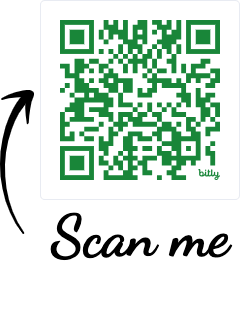

### Important Definitions

- Artificial Intelligence (AI): The ability of machines to mimic human intelligence.
- Machine Learning (ML): A broad field that encompasses various algorithms and techniques used to train computer systems to learn from data and make predictions or decisions without being explicitly programmed
- Deep Learning (DL): A subset of machine learning that utilizes artificial neural networks, a layered structure of algorithms modeled after the human brain
- Neural Network: Algorithms modeled after the brain to recognize patterns.
- TensorFlow & Keras: TensorFlow is a machine learning library; Keras is a high-level API on top of TensorFlow.

### The Machine Learning Model LifeCycle

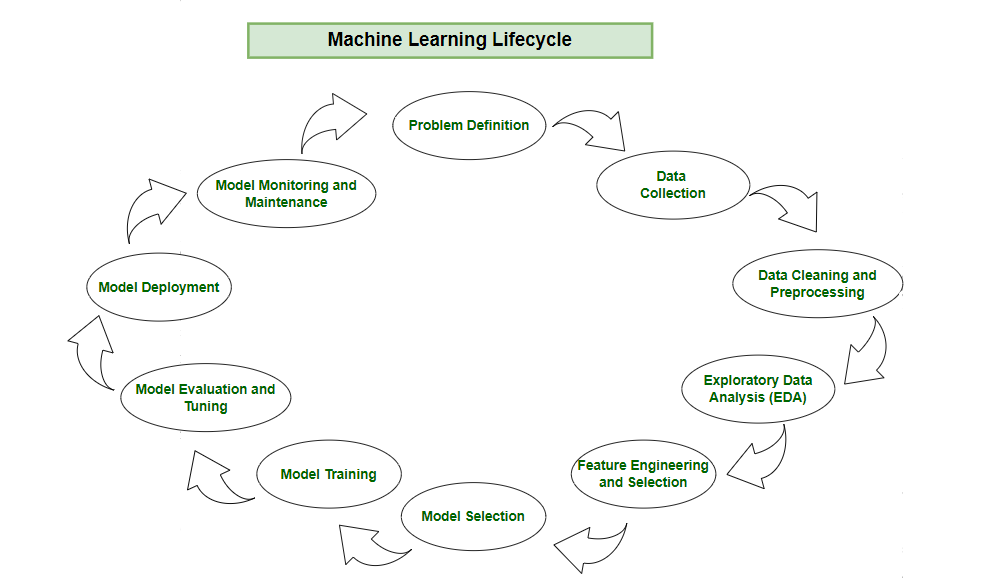

# Get Started

### Install Python, numpy, pandas, jupyter notebook, scikit-learn

   # OR Alternatively,

### Install Anaconda

Secondly, install Keras

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = pd.read_csv("dataset/titanic.csv")

In [6]:
# explore dataset
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

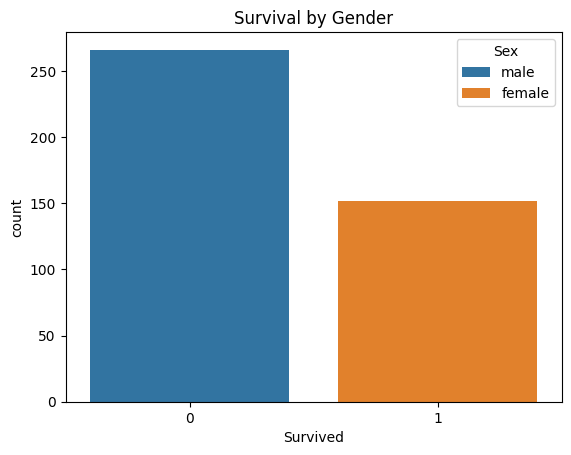

In [9]:
sns.countplot(data=data, x="Survived", hue="Sex")
plt.title("Survival by Gender")
plt.show()

In [13]:
#perform feature engineering
Y = data.iloc[:,1]
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [14]:
X = data.drop(['Survived'], axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
# age, = median
#embarked = mode
age_median = X["Age"].median()
age_median
X["Age"] = X["Age"].fillna(age_median)
X["Age"].isnull().sum()


#Embarked
embarked_mode = X["Embarked"].mode()[0]
embarked_mode
X["Embarked"] = X["Embarked"].fillna(embarked_mode)
X["Embarked"].isnull().sum()

0

In [25]:
X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)


KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [26]:
X.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,True


In [27]:
#divide your dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

08063409307

In [ ]:
#build the model

In [ ]:
#train the model

In [ ]:
# Evaluate and test accuracy

In [ ]:
# save the model

### Further Reading: 
- My video for PyCon Africa 2020: [https://www.youtube.com/watch?v=TwJFVqF7XF8]
- Data Normalization techniques: [https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1]
- Activation Functions in Neural Network [https://www.geeksforgeeks.org/activation-functions-neural-networks/]